<a href="https://colab.research.google.com/github/fhnribeiro/mpv-puc-analise-dados/blob/main/An%C3%A1lise_de_Dados_e_Boas_Pr%C3%A1ticas_(40530010055_20250_01).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Análise de Dados e Boas Práticas

**Nome:** Fábio Henrique Neves Reis Ribeiro

**Matrícula:** 4052025000834

**Dataset:** [Video Game Sales](https://www.kaggle.com/datasets/gregorut/videogamesales?select=vgsales.csv)

# Descrição do Problema !!!Fazer



## Tipo de Problema

Este é um problema de análise exploratória, cujo objetivo é avaliar o comportamento das vendas de jogos, analisando os mercados norte americano, europeu, japonês e o resto do mundo. Busca-se entender se é possível identificar padrões de venda com base no gênero, console e mercado, a fim de traçar um perfil detalhado do desempenho no setor.

## Seleção de Dados

O dataset *Video Games Sales* é um conjunto de dados baixados do site *vgchartz.com*, ele é composto apenas por jogos que estavam com pelo menos 100 mil cópias vendidas.

## Atributos do Dataset

O dataset é composto por 16.598 registros e possui 11 atributos:

- ***Rank*** (Classificação geral no ranking de vendas)
- ***Name*** (Nome do jogo)
- ***Platform*** (Plataforma)
- ***Year*** (Ano de lançamento)
- ***Genre*** (Gênero do jogo)
- ***Publisher*** (Estúdio)
- ***NA_Sales*** (Vendas na América do Norte)
- ***EU_Sales*** (Vendas na Europa)
- ***JP_Sales*** (Vendas no Japão)
- ***Other_Sales*** (Vendas no resto do mundo)
- ***Global_Sales*** (Total de vendas no mundo inteiro)

# Importação das Bibliotecas Necessárias e Carga de Dados

Esta seção consolida todas as importações de bibliotecas necessárias para a análise, visualização e pré-processamento dos dados, bem como o carregamento inicial do dataset.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer

In [ ]:
#Url da base de dados
url_dados = ("https://raw.githubusercontent.com/fhnribeiro/mpv-puc-analise-dados/refs/heads/main/data/vgsales.csv")

In [ ]:
# guardo o dataset em um dataframe que dei o nome de games_raw
games_raw = pd.read_csv(url_dados)
# Faço uma cópia dos dados originais, para não afetar as tabelas de visualização
# de dados, após o pré processamento
games = games_raw.copy()

Os 10 primeiros registros do dataset

In [ ]:
# primeiras 10 linhas
games_raw.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


# Análise de Dados

Nesta etapa vamos analisar as dimensões dos dados do dataset e como ele é composto

## Total e Tipo das Instâncias


In [ ]:
#Quantidade de registros no dataset
print(f"Total de instâncias: {len(games_raw)}")
#Analise dos atributos
print("\nTipos de dados por coluna:")
print(games_raw.info())

Total de instâncias: 16598

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB
None


Podemos obervar que o daset é composto por 16.598 registros, sendo eles compostos por 11 atributos, descritos acima.

Os atrinutos Year e Publisher possuem um número diferente de registros, por isso vou fazer uma análise individual de cada um

In [ ]:
print('Analise da coluna de ano')
print(games_raw['Year'].describe())
print('')
print('Analise da coluna da publicadora')
print(games_raw['Publisher'].describe())
print('')
ambos_nulos = games_raw[games_raw['Year'].isnull() & games_raw['Publisher'].isnull()]
print("Entradas com 'Year' nulo:", games_raw['Year'].isnull().sum())
print("Entradas com 'Publisher' nulo:", games_raw['Publisher'].isnull().sum())
print("Ambos nulo:", len(ambos_nulos) )

Analise da coluna de ano
count    16327.000000
mean      2006.406443
std          5.828981
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

Analise da coluna da publicadora
count               16540
unique                578
top       Electronic Arts
freq                 1351
Name: Publisher, dtype: object

Entradas com 'Year' nulo: 271
Entradas com 'Publisher' nulo: 58
Ambos nulo: 22


### Pré processamento


Com a analise feita acima podemos perceber que dois campos possuem registros com dados inválidos, o ano e a publicadora como não são dados que possam ser tratados utilizando uma média ou algum valor padrão, eles serão apenas ignorados

In [ ]:
# Remove os valores nulos do dataset com os dados que serão utilizados para
# visualização daqui para frente
games = games.dropna()
print(games.info())

<class 'pandas.core.frame.DataFrame'>
Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB
None


Com isso o total de registros ficou 16.291.

Alem dos registros com valor nulo, durante o uso do dataset foi encontrado um registro do console Nintendo DS, que estava com o ano de lançamento muito inferior aos demais, inclusive inferior a data de lançamento do próprio console, por isso resolvi remove-lo

In [ ]:
filtro = ~((games['Year'] < 2000) & (games['Platform'] == 'DS'))
games = games[filtro]

Conversão do ano de Float para inteiro, feito a normalização para uma melhor visualização do dado.

In [ ]:
games['Year'] = games['Year'].astype(int)

/tmp/ipython-input-10-453032489.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games['Year'] = games['Year'].astype(int)


### Analises

Vamos analisar a produção de jogos e o volume de venda por ano e por console.

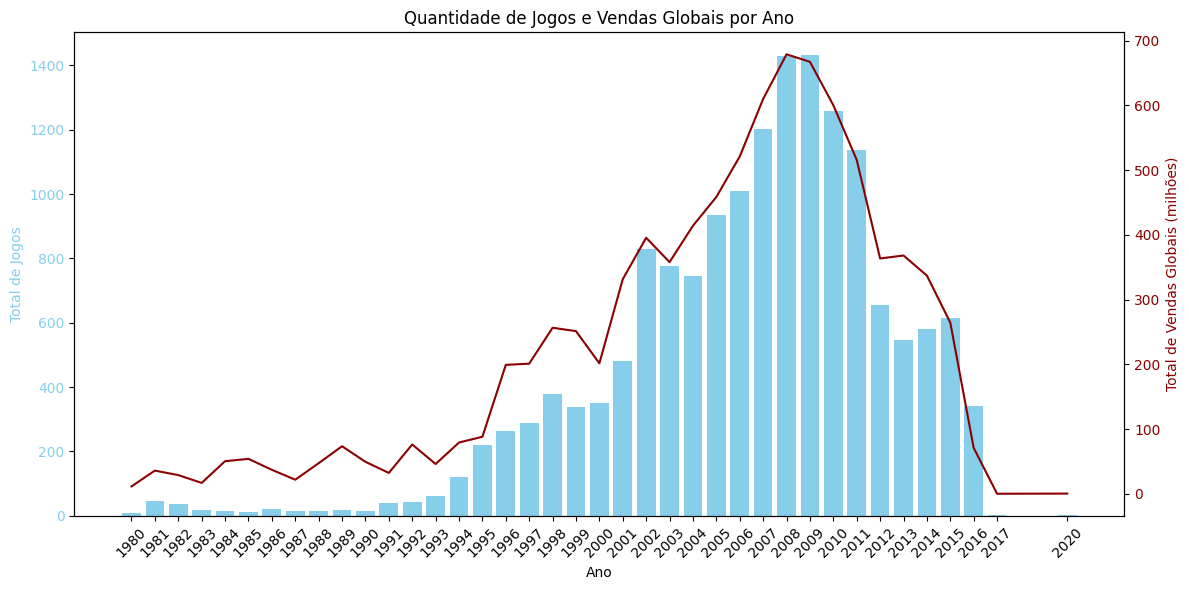

In [ ]:
# Agrupa o total de jogos por ano
games_by_year = games.groupby('Year').size()

# Agrupa o total de vendas globais por ano (soma da coluna Global_Sales)
sales_by_year = games.groupby('Year')['Global_Sales'].sum()

# Cria um DataFrame combinando total de jogos e total de vendas, ordenado pela quantidade de jogos
df_grouped = pd.DataFrame({
    'Total_Games': games_by_year,
    'Total_Sales': sales_by_year
}).sort_index(ascending=True)

# Cria o gráfico com dois eixos Y
fig, ax1 = plt.subplots(figsize=(12,6))

# Plota o gráfico de barras para total de jogos
ax1.bar(df_grouped.index, df_grouped['Total_Games'], color='skyblue')
ax1.set_xlabel('Ano')
ax1.set_ylabel('Total de Jogos', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_xticks(df_grouped.index)
ax1.set_xticklabels(df_grouped.index, rotation=45)


# Cria o segundo eixo Y e plota a linha de total de vendas
ax2 = ax1.twinx()
ax2.plot(df_grouped.index, df_grouped['Total_Sales'], color='darkred')
ax2.set_ylabel('Total de Vendas Globais (milhões)', color='darkred')
ax2.tick_params(axis='y', labelcolor='darkred')

#Informações do gráfico
plt.title('Quantidade de Jogos e Vendas Globais por Ano')
plt.tight_layout()
plt.show()

Com este gráfico podemos ver que a partir de 1995 há uma forte tendência de crescimento tanto de venda quanto de números de jogos.

O pico ocorre entre 2007 e 2009 com 1.400 jogos lançados e mais de 650 milhões de unidades vendidas.

Após 2010 há um queda acentuada nas vendas e na produção de jogos, podendo ser uma limitação do dataset, após a migração para vendas nas próprias lojas das empresas de video games, que acabam não sendo divulgadas como antes.

A queda após 2015 é limitação do dataset.

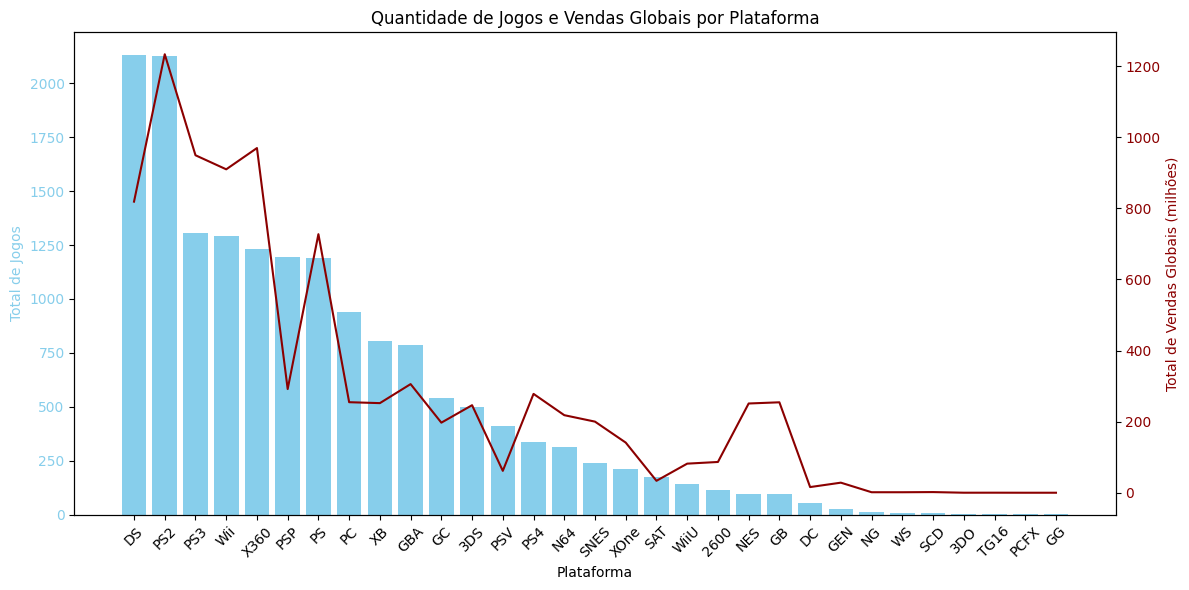

In [ ]:
# Agrupa o total de jogos por plataforma
games_by_platform = games.groupby('Platform').size()

# Agrupa o total de vendas globais por plataforma (soma da coluna Global_Sales)
sales_by_platform = games.groupby('Platform')['Global_Sales'].sum()

# Cria um DataFrame combinando total de jogos e total de vendas, ordenado pela quantidade de jogos
df_grouped = pd.DataFrame({
    'Total_Games': games_by_platform,
    'Total_Sales': sales_by_platform
}).sort_values(by='Total_Games', ascending=False)

# Cria o gráfico com dois eixos Y
fig, ax1 = plt.subplots(figsize=(12,6))

# Plota o gráfico de barras para total de jogos
ax1.bar(df_grouped.index, df_grouped['Total_Games'], color='skyblue')
ax1.set_xlabel('Plataforma')
ax1.set_ylabel('Total de Jogos', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_xticks(df_grouped.index)
ax1.set_xticklabels(df_grouped.index, rotation=45)


# Cria o segundo eixo Y e plota a linha de total de vendas
ax2 = ax1.twinx()
ax2.plot(df_grouped.index, df_grouped['Total_Sales'], color='darkred')
ax2.set_ylabel('Total de Vendas Globais (milhões)', color='darkred')
ax2.tick_params(axis='y', labelcolor='darkred')

#Informações do gráfico
plt.title('Quantidade de Jogos e Vendas Globais por Plataforma')
plt.tight_layout()
plt.show()

O gráfico mostra que o PlayStation 2 (PS2) é a plataforma com maior número de vendas globais, apesar de ter menos jogos lançados que o Nintendo DS. Isso indica que o PS2 obteve maior sucesso comercial por título lançado.

Ainda assim, o desempenho do Nintendo DS foi sólido: superou o GBA tanto em volume de vendas quanto em número de títulos, consolidando o domínio da Nintendo no mercado de consoles portáteis.

O Xbox 360 mostra um forte crescimento em comparação ao Xbox original, aproximando-se das vendas do PS3 e indicando uma recuperação significativa da Microsoft frente à Sony.

É importante notar o bom desempenho do Nintendo Wii, que mesmo com menos jogos do que PS2, DS e PS3, atingiu um volume de vendas expressivo.

Por outro lado, o PC apresentam um alto número de lançamentos com vendas globais modestas.

### Heatmap

Vamos analisar a quantidade de jogos feitas por ano para cada console, para podermos avaliar a vida útil de cada um

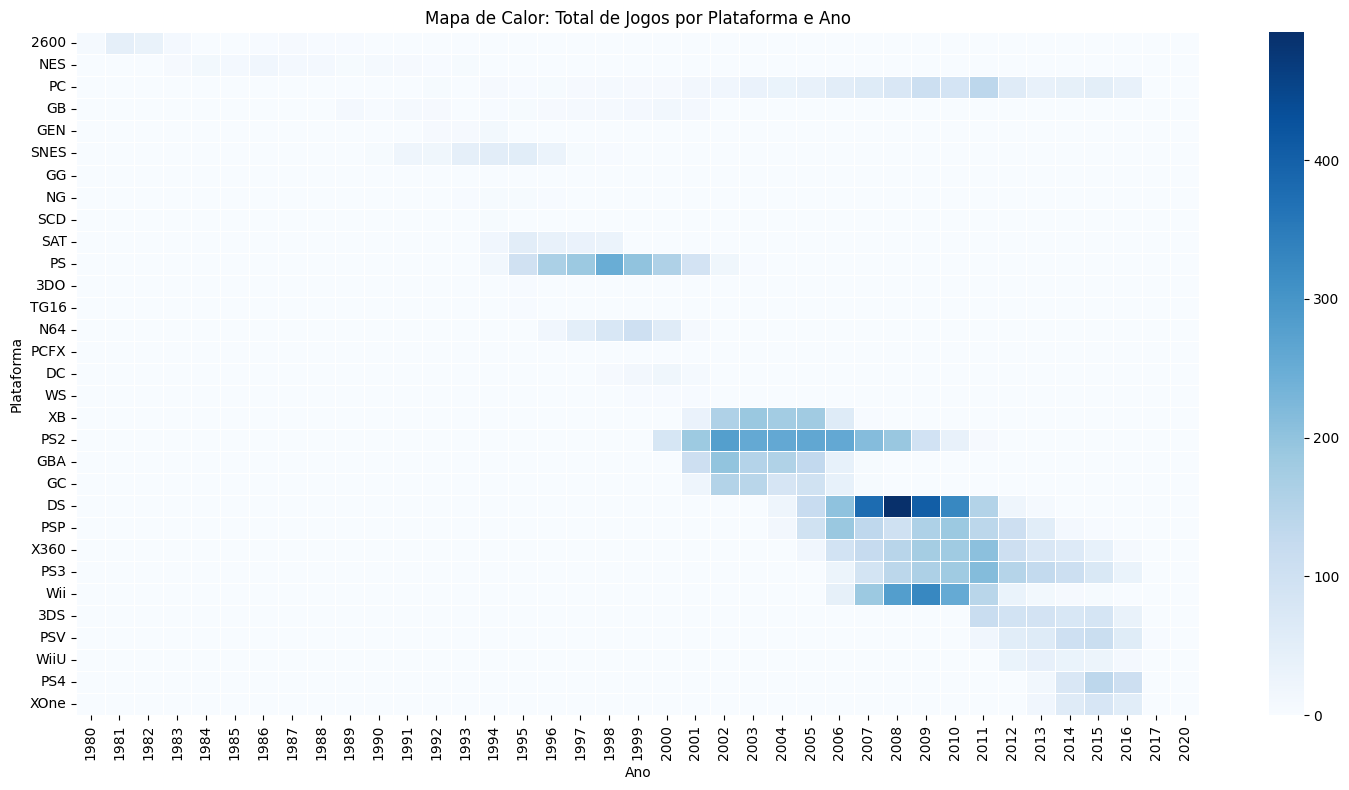

In [ ]:
# Agrupa o total de jogos por ano e plataforma
games_grouped = games.groupby(['Year', 'Platform']).size().unstack(fill_value=0).sort_index()

#Obtém o primeiro ano de lançamento para cada plataforma
first_years = games.groupby('Platform')['Year'].min()

#Ordena as plataformas com base no primeiro ano de lançamento
plataform_sorted = first_years.sort_values().index

#Atualizo a lista de jogos conforme a ordem das plataformas
games_grouped = games_grouped[plataform_sorted]

#Plota o heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(games_grouped.T, cmap='Blues', linewidths=0.5)

#Informações do gráfico
plt.title('Mapa de Calor: Total de Jogos por Plataforma e Ano')
plt.xlabel('Ano')
plt.ylabel('Plataforma')
plt.tight_layout()
plt.show()

Com esse mapa de calor podemos ver como a produção de jogos segue um padrão, onde tem um pico de produção entre o 2º e o 4º anos após o lançamento do primeiro jogo, e vai diminuindo logo antes do lançamento do sucessor.

Da pra perceber o sucesso de cada console também, onde o Playstation 1 e 2, e o Nintendo DS e Wii possuem uma produção maior do que os seus concorrentes

### Jogos mais vendidos

<Axes: ylabel='Name'>

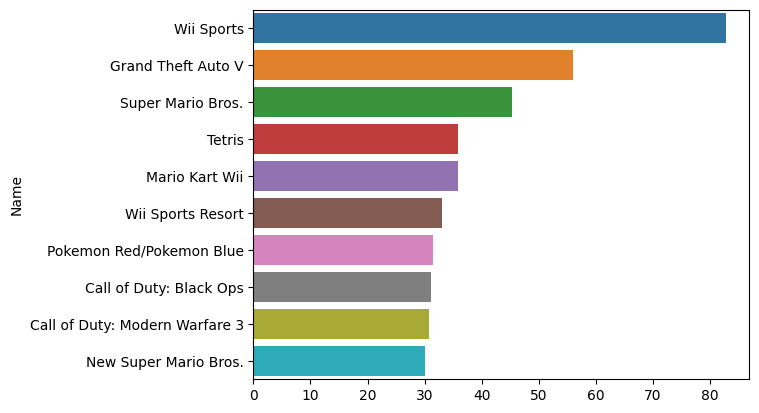

In [61]:
game_sales = games.groupby('Name')['Global_Sales'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=game_sales.values, y=game_sales.index, hue=game_sales.index, legend=False)

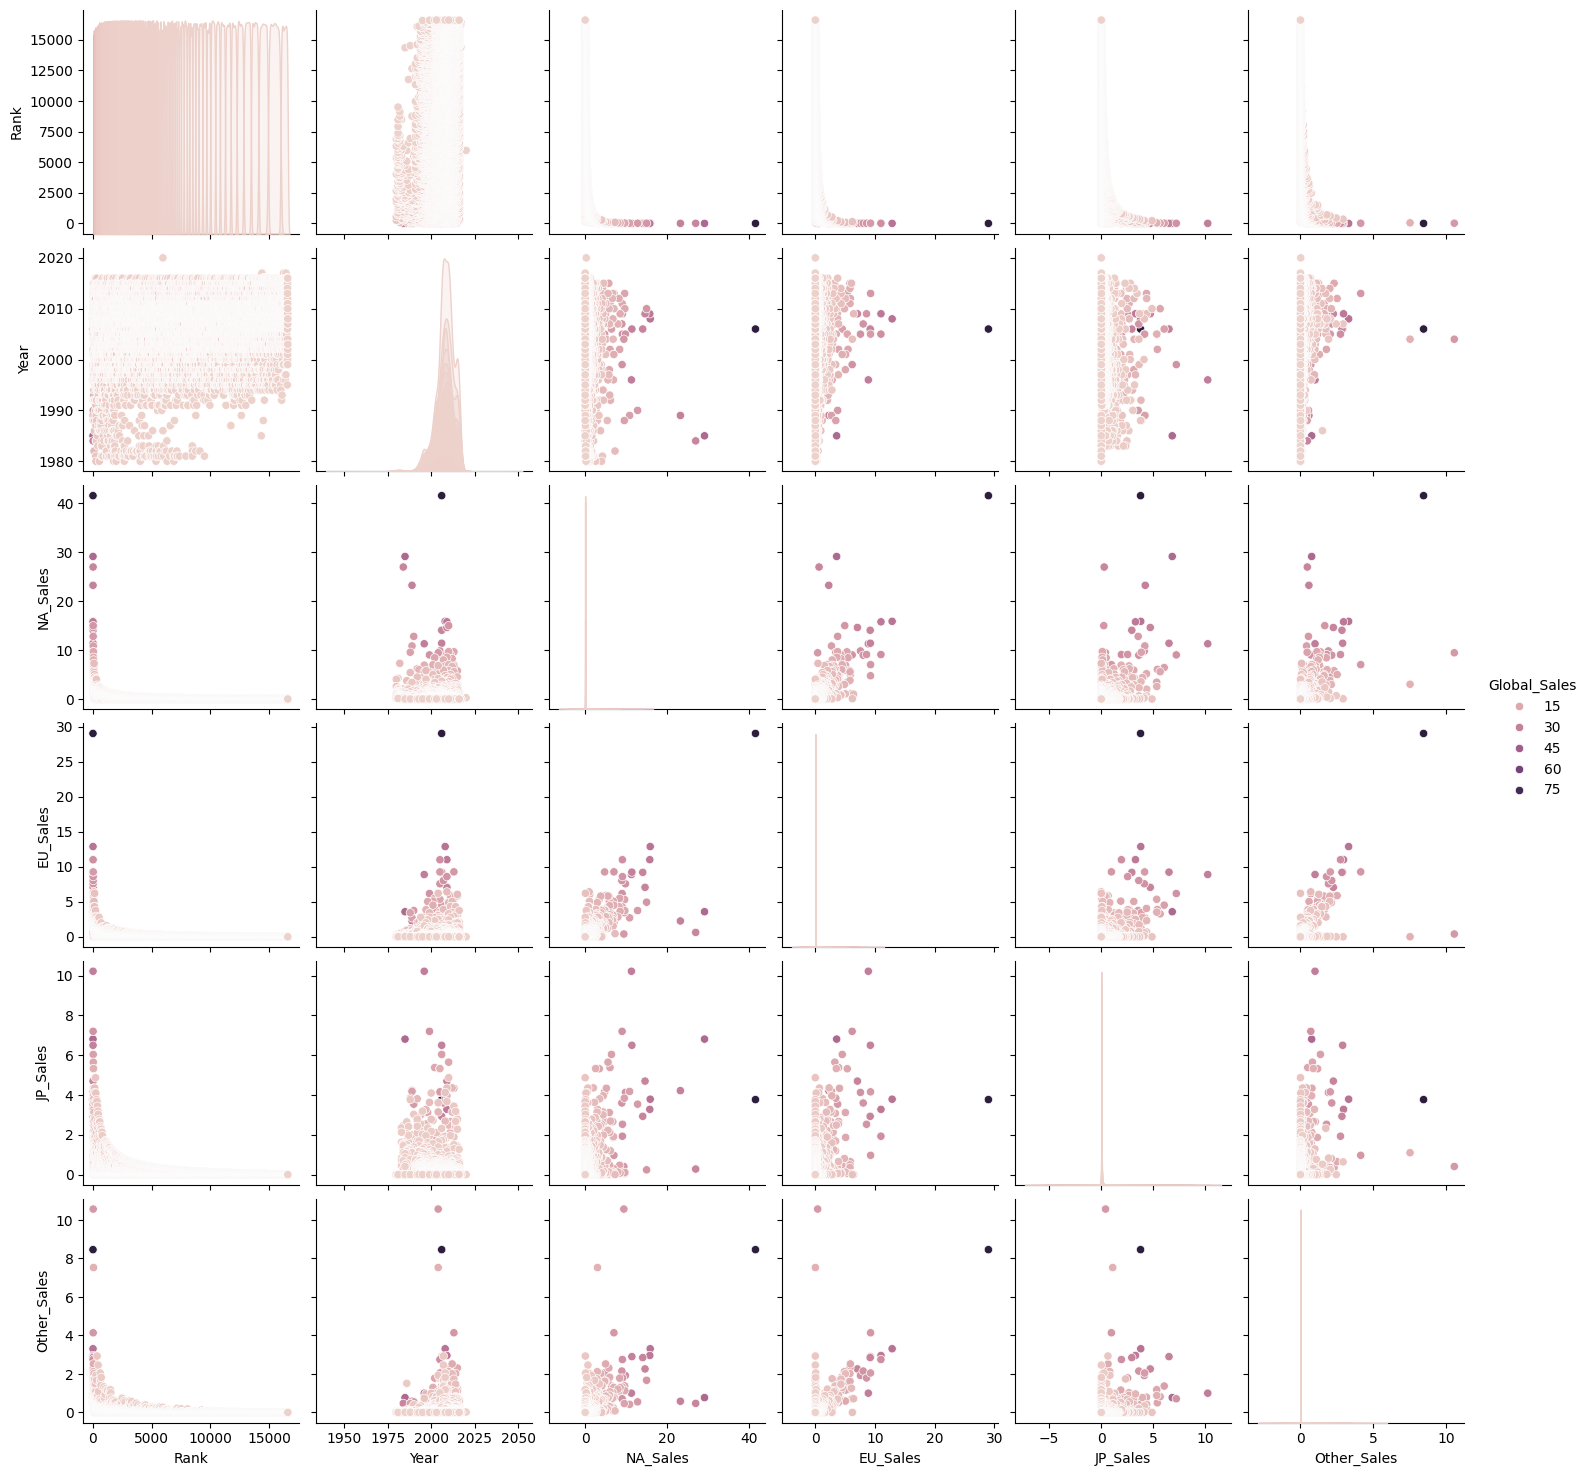

In [ ]:
sns.pairplot(games, hue = "Global_Sales", height = 2.5);

## Estatísticas Descritivas

Vamos analisar as dimensões do dataset e identificar os atributos que o compõem

In [ ]:
# estatísticas descritivas básicas do dataset
games.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


Aqui podemos ver as médias de vendas, e como o mercado da América do Norte e da europa são fortes, mas o Japão apesar de possuir uma população menor dos que demais possui um mercado expressivo, principalemnte comparado com o resto do mundo.

In [ ]:
#Definição das colunas numericas para facilitar
numeric_cols = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

### Média

A média é uma medida de tendência central que representa o valor típico ou o ponto de equilíbrio de um conjunto de dados. É calculada somando-se todos os valores e dividindo-se pelo número total de observações. É sensível a valores extremos (outliers).

In [ ]:
# média dos atributos numéricos do dataset
games.describe().loc['mean']

,mean
Rank,8300.605254
Year,2006.406443
NA_Sales,0.264667
EU_Sales,0.146652
JP_Sales,0.077782
Other_Sales,0.048063
Global_Sales,0.537441


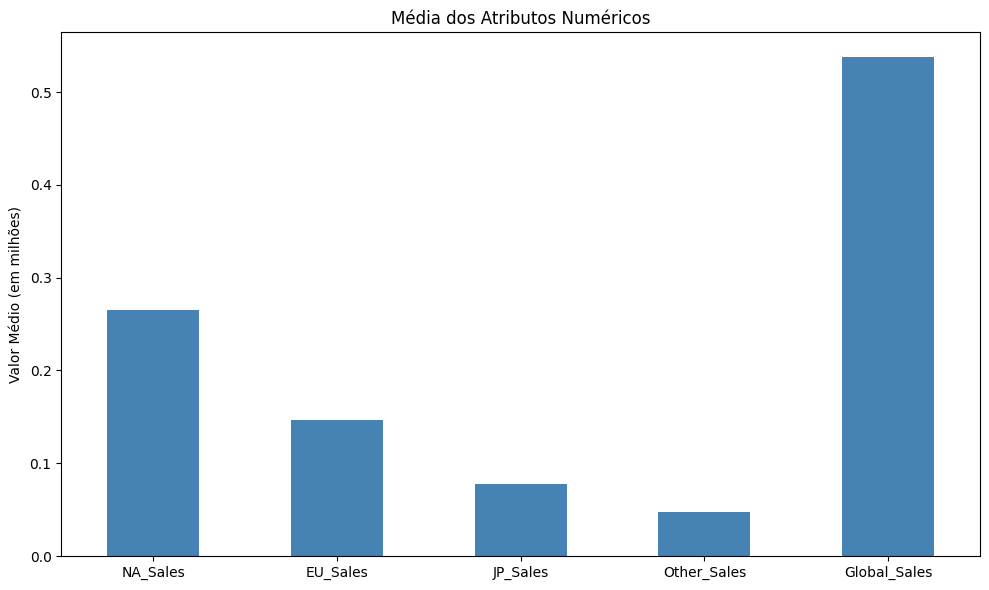

In [ ]:
#Removi os campos Rank e Year, pois eles não fazem sentido para um média
mean_values = games[numeric_cols].mean()

# Plot
plt.figure(figsize=(10, 6))
mean_values.plot(kind='bar', figsize=(10,6), color='steelblue')

plt.title('Média dos Atributos Numéricos')
plt.ylabel('Valor Médio (em milhões)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Desvio Padrão

O desvio padrão é uma medida de dispersão que quantifica a quantidade de variação ou dispersão de um conjunto de valores. Um desvio padrão baixo indica que os pontos de dados tendem a estar próximos da média do conjunto, enquanto um desvio padrão alto indica que os pontos de dados estão espalhados por uma faixa maior de valores. Ele é a raiz quadrada da variância.

In [50]:
# desvio padrão dos atributos numéricos do dataset
games[numeric_cols].describe().loc['std']

,std
NA_Sales,0.816683
EU_Sales,0.505351
JP_Sales,0.309291
Other_Sales,0.188588
Global_Sales,1.555028


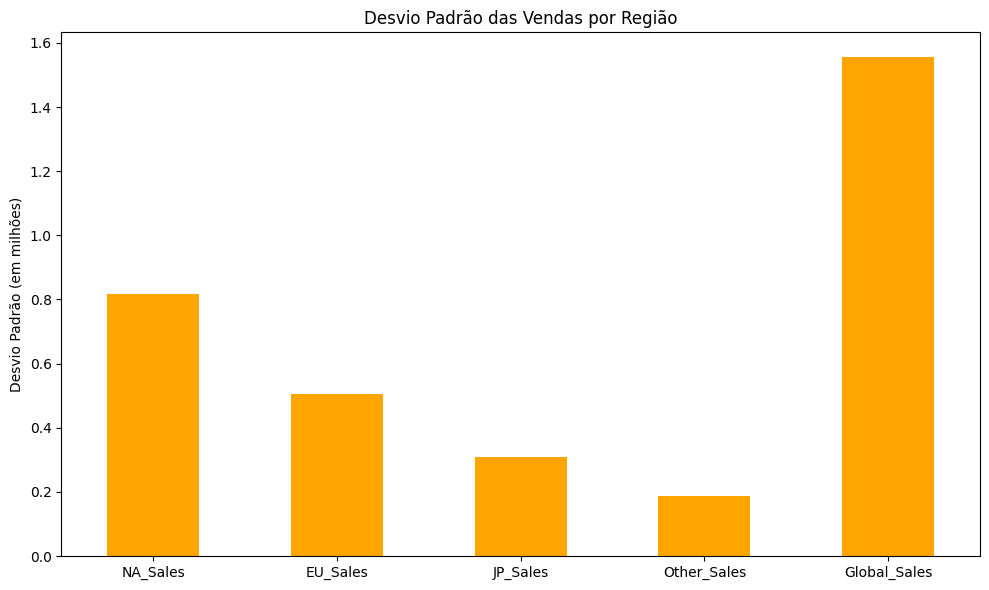

In [51]:
std_series = pd.Series(games[numeric_cols].describe().loc['std'])

# Plota o gráfico
std_series.plot(kind='bar', color='orange', figsize=(10, 6))
plt.title('Desvio Padrão das Vendas por Região')
plt.ylabel('Desvio Padrão (em milhões)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Histograma

Vamos analisar o total de venda em cada mercado, para uma melhor visualização separei os registros em 2 grupos, o primeiro com jogos que tenham entre 1 e 10 milhões de cópias vendidas e o segundo grupo com os que tem mais de 10 milhães

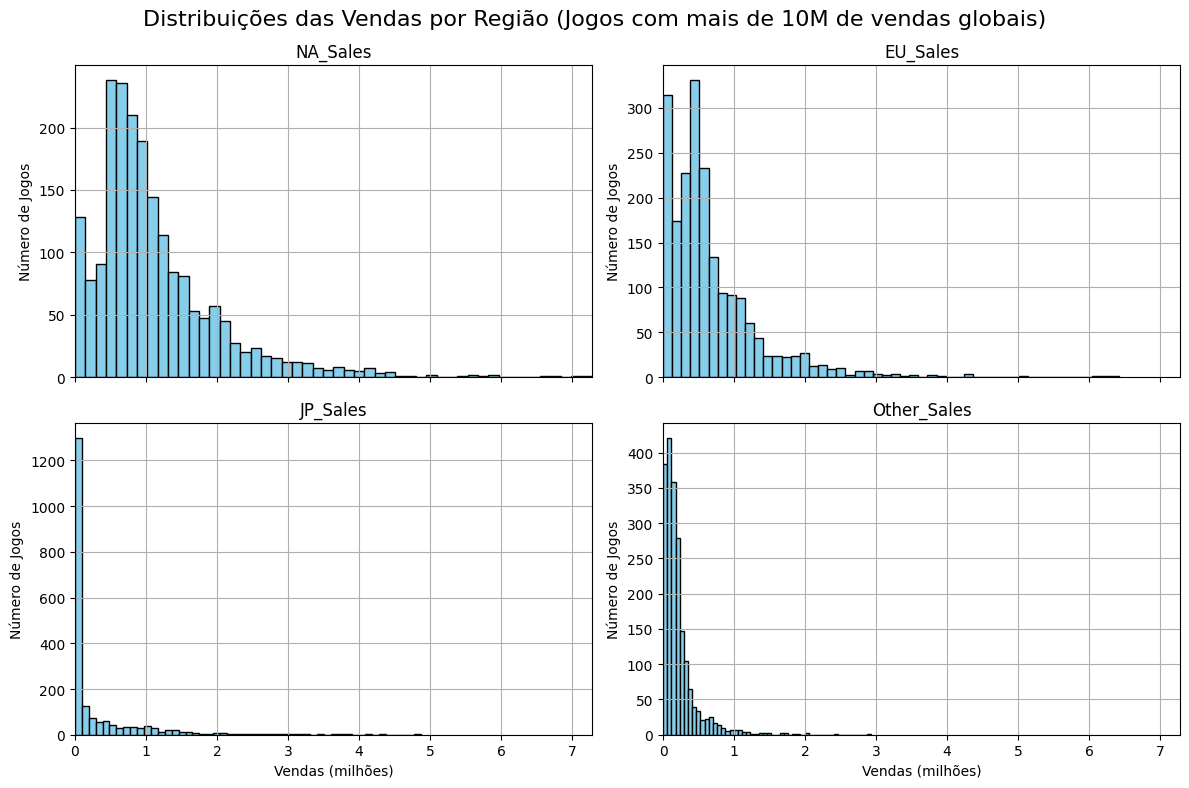

In [49]:
sales_without_gloabl = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
filtered_data = games[(games['Global_Sales'] > 1) & (games['Global_Sales'] <= 10)]
# Define os limites do eixo X (em comum)
x_min = 0
x_max = filtered_data[sales_without_gloabl].max().max()  # maior valor entre as colunas

# Cria os histogramas com eixos X compartilhados
axes = filtered_data[sales_without_gloabl].hist(
    bins=50,
    figsize=(12, 8),
    color='skyblue',
    edgecolor='black',
    sharex=True
)

# Aplica o mesmo limite de eixo X em todos os gráficos
for ax in axes.flatten():
    ax.set_xlim(x_min, x_max)
    ax.set_xlabel('Vendas (milhões)')
    ax.set_ylabel('Número de Jogos')

plt.suptitle('Distribuições das Vendas por Região (Jogos com mais de 10M de vendas globais)', fontsize=16)
plt.tight_layout()
plt.show()

Neste histograma estão sendo exibidos os jogos que possuem entre 1M e 10M de vendas globais.

Podemos que o gráfica bem achatado com a maioria ficando abaixo de 2M

Outra coisa que chama atenção é quantidade de jogos com valor 0 no resto do mundo e principalmente no Japão, o que pode indicar a falta desta informação também

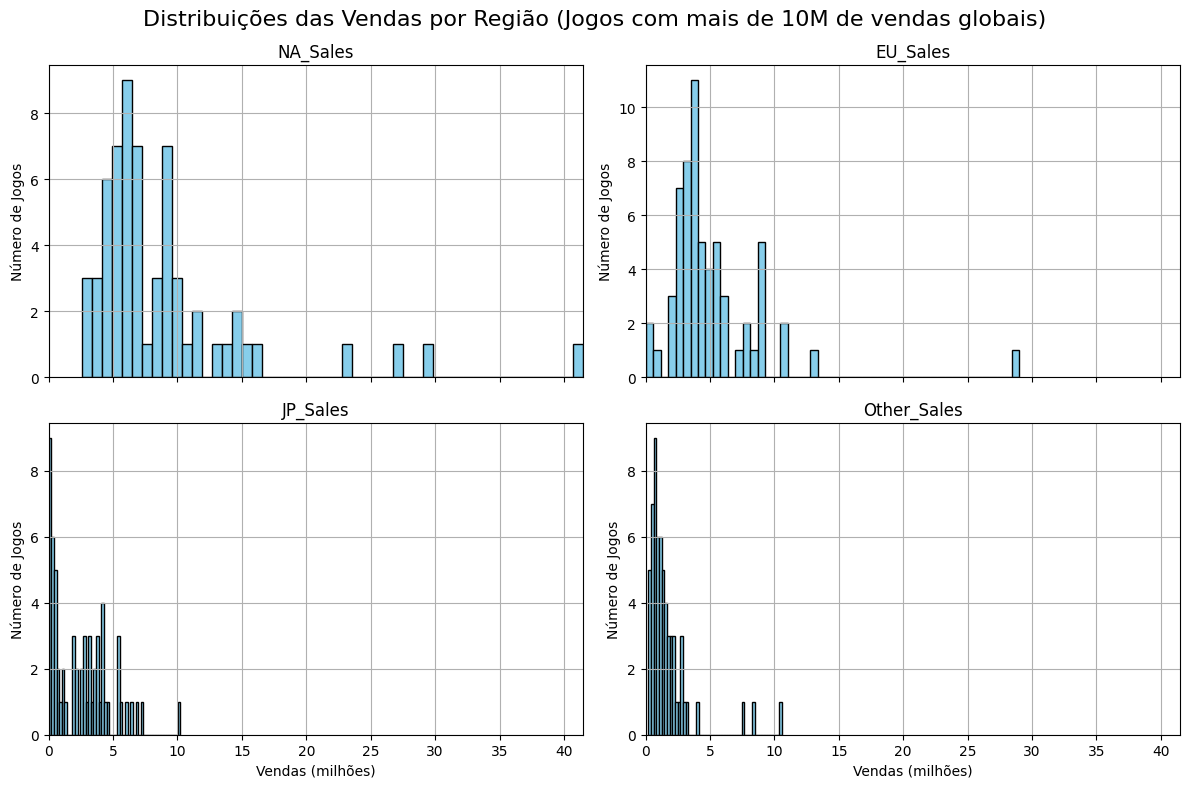

In [48]:
filtered_data = games[games['Global_Sales'] > 10]

# Define os limites do eixo X (em comum)
x_min = 0
x_max = filtered_data[sales_without_gloabl].max().max()  # maior valor entre as colunas

# Cria os histogramas com eixos X compartilhados
axes = filtered_data[sales_without_gloabl].hist(
    bins=50,
    figsize=(12, 8),
    color='skyblue',
    edgecolor='black',
    sharex=True
)

# Aplica o mesmo limite de eixo X em todos os gráficos
for ax in axes.flatten():
    ax.set_xlim(x_min, x_max)
    ax.set_xlabel('Vendas (milhões)')
    ax.set_ylabel('Número de Jogos')

plt.suptitle('Distribuições das Vendas por Região (Jogos com mais de 10M de vendas globais)', fontsize=16)
plt.tight_layout()
plt.show()

Neste histograma estão sendo exibidos os jogos que possuem mais de 10M de vendas globais.

Podemos ver como o mercado norte americano tem uma venda maior, com uma distribuição mais ampla, enquanto o japonês e o resto do mundo é mais achatado.

Vale ressaltar a quantidade de jogos no japão e no resto do mundo que estão com o valor 0

## Boxplot !!! FAZER

Para entender as diferenças entre as espécies, devemos olhar como se comportam os valores quando agrupadas por espécie. Isso nos permite comparar a média, mediana e desvio padrão de cada característica para Iris setosa, Iris versicolor e Iris virginica, além de visualizar suas distribuições por meio de boxplots.


## Matriz de Correlação

A matriz de correlação mede a força e a direção de uma relação linear que os atributos numéricos das espécies podem ter. Valores próximos a 1 indicam uma forte correlação positiva, -1 uma forte correlação negativa, e 0 ausência de correlação linear.

In [52]:
#Array com as colunas de valor númerico, sem considerar o rank e o ano
numeric_cols = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

df_numeric = games[numeric_cols]
# Matriz de correlação
print("\nMatriz de Correlação:")
df_numeric.iloc[:].corr()


Matriz de Correlação:


,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
NA_Sales,1.000000,0.767727,0.449787,0.634737,0.941047
EU_Sales,0.767727,1.000000,0.435584,0.726385,0.902836
JP_Sales,0.449787,0.435584,1.000000,0.290186,0.611816
Other_Sales,0.634737,0.726385,0.290186,1.000000,0.748331
Global_Sales,0.941047,0.902836,0.611816,0.748331,1.000000


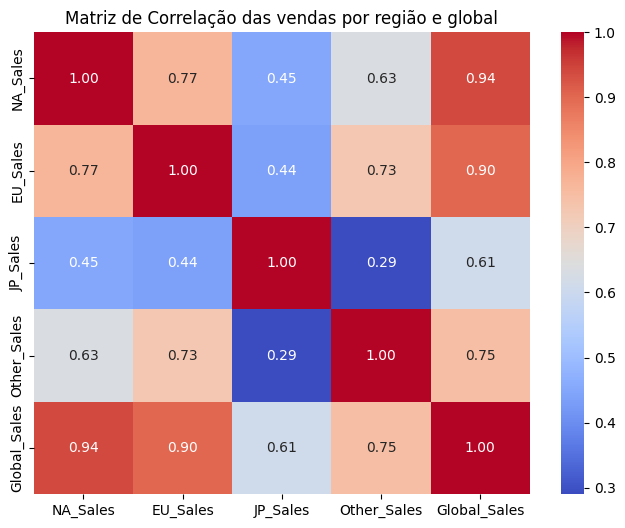

In [53]:
plt.figure(figsize=(8, 6))
# mapa de calor das variáveis numéricas
sns.heatmap(df_numeric.iloc[:].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação das vendas por região e global')
plt.show()

Vendo o mapa de calor, podemos ver que o mercado japonês acaba sendo o mais diferente em relação aos demais enquanto o norte americano e o europeu são bem relacionados

## Tratamento de Valores Nulos

O dataset possui valores nulos nos atributos Year e Publisher, mas já foram tratados no início do estudo para uma melhor visualização

In [ ]:
# Verificar a presença de valores nulos no dataset original
print("Valores nulos no dataset:")
games_raw.isnull().sum()

Valores nulos no dataset:


,0
Rank,0
Name,0
Platform,0
Year,271
Genre,0
Publisher,58
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


# Pré-Processamento de Dados

O pré-processamento de dados é uma etapa crucial para preparar os dados para modelagem, garantindo que estejam no formato correto e otimizados para o desempenho do algoritmo.

In [ ]:
# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

NameError: name 'train_test_split' is not defined

In [ ]:
print(f"Dimensões de X_train: {X_train.shape}")
print(f"Dimensões de X_test: {X_test.shape}")
print(f"Dimensões de y_train: {y_train.shape}")
print(f"Dimensões de y_test: {y_test.shape}")

## Normalização

## Padronização

A padronização (ou Z-score scaling) transforma os dados para ter média 0 e desvio padrão 1. É útil para algoritmos que são sensíveis à escala das características, como SVMs ou redes neurais.

## Outras Transformações e Etapas de Pré-Processamento

Outras etapas de pré-processamento incluem a seleção de características, redução de dimensionalidade (como PCA) ou criação de novas características (feature engineering). O que você faria a mais?



# Conclusão

A análise e pré-processamento do dataset Iris demonstram a importância de entender a estrutura dos dados antes da modelagem. O dataset é limpo e balanceado, com características numéricas bem definidas que permitem uma clara separação entre as espécies, especialmente a Iris setosa. A análise exploratória revelou correlações importantes entre as características e a eficácia de visualizações como boxplots para distinguir as classes. As etapas de normalização e padronização são fundamentais para preparar os dados para diversos algoritmos de aprendizado de máquina, garantindo que o modelo possa aprender eficientemente com as relações presentes nos dados.

As três hipóteses levantadas foram validadas:

1.   *As diferentes espécies de Íris podem ser distinguidas com base nas medições de suas sépalas e pétalas?* Sim, dado as análises que fizemos no boxplot, observamos um comportamento muito claro e distinto.

2.   *Existe uma correlação entre comprimento da pétala e largura da pétala?* Existe forte correlação entre os atributos *petal length* e *petal width*.

3.   *A espécie Iris setosa é mais facilmente separável das outras duas espécies?* Sim, devido às suas características distintas de menor comprimento e largura da pétala.